In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import pylab
import seaborn as sns
import os
from os import path
from scipy.stats import pearsonr, spearmanr, chi2_contingency
from scipy.cluster.hierarchy import fcluster, fclusterdata, linkage, dendrogram 
import matplotlib.patches as patches
from copy import deepcopy
import pickle
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from scipy.integrate import odeint


# common formatting
plt.style.use('../synthetic-enhancer-footprinting.mplstyle')

import sys  
sys.path.insert(0, '/oak/stanford/groups/wjg/bgrd/papers/synthetic_enhancer_footprinting/code/amplicon-smf/workflow/scripts')

import common
import ast
import importlib
importlib.reload(common)
%matplotlib inline

import matplotlib.font_manager
import warnings
warnings.filterwarnings("ignore")

flow_head = '/oak/stanford/groups/wjg/jschaepe/projects/smf/synthetic-enhancer-footprinting-data/'
flow_df_head = flow_head + 'flow_dfs/'
qpcr_head = '/oak/stanford/groups/wjg/bgrd/papers/synthetic_enhancer_footprinting/data/qpcr_data/'
thresh_head = flow_head + 'flow_dfs/Citrine_thresh/'
output_head = '/oak/stanford/groups/wjg/jschaepe/projects/smf/synthetic-enhancer-footprinting-outputs/'
smf_table = '/oak/stanford/groups/wjg/bgrd/papers/synthetic_enhancer_footprinting/data/all_smf_experiments_aggregator/231108_all_smf_experiments.txt'

opJS4 = ['opJS4_0x_TetO_21bp_no_CG','opJS4_1x_TetO_21bp_no_CG','opJS4_2x_TetO_21bp_no_CG','opJS4_3x_TetO_21bp_no_CG','opJS4_4x_TetO_21bp_no_CG',
         'opJS4_5x_TetO_21bp_no_CG', 'opJS4_6x_TetO_21bp_no_CG','opJS4_7x_TetO_21bp_no_CG','opJS4_8x_TetO_21bp_no_CG']

opJS5 = ['opJS5_0xTetO_18bp_b1',
 'opJS5_0xTetO_18bp_b2',
 'opJS5_1xTetO_18bp_b1',
 'opJS5_1xTetO_18bp_b2',
 'opJS5_2xTetO_18bp_b1',
 'opJS5_2xTetO_18bp_b2',
 'opJS5_3xTetO_18bp_b1',
 'opJS5_3xTetO_18bp_b2',
 'opJS5_4xTetO_18bp_b1',
 'opJS5_4xTetO_18bp_b2',
 'opJS5_5xTetO_18bp_b1',
 'opJS5_5xTetO_18bp_b2',
 'opJS5_6xTetO_18bp_b1',
 'opJS5_6xTetO_18bp_b2',
 'opJS5_7xTetO_18bp_b1',
 'opJS5_7xTetO_18bp_b2',
 'opJS5_8xTetO_18bp_b1',
 'opJS5_8xTetO_18bp_b2',
 'opJS5_9xTetO_18bp_b1',
 'opJS5_9xTetO_18bp_b2']

TFBS_map = {'opJS4_0x_TetO_21bp_no_CG':0,'opJS4_1x_TetO_21bp_no_CG':1,'opJS4_2x_TetO_21bp_no_CG':2,'opJS4_3x_TetO_21bp_no_CG':3,'opJS4_4x_TetO_21bp_no_CG':4,
         'opJS4_5x_TetO_21bp_no_CG':5, 'opJS4_6x_TetO_21bp_no_CG':6,'opJS4_7x_TetO_21bp_no_CG':7,'opJS4_8x_TetO_21bp_no_CG':8,
           'opJS5_0xTetO_18bp_b1':0,
 'opJS5_0xTetO_18bp_b2':0,
 'opJS5_1xTetO_18bp_b1':1,
 'opJS5_1xTetO_18bp_b2':1,
 'opJS5_2xTetO_18bp_b1':2,
 'opJS5_2xTetO_18bp_b2':2,
 'opJS5_3xTetO_18bp_b1':3,
 'opJS5_3xTetO_18bp_b2':3,
 'opJS5_4xTetO_18bp_b1':4,
 'opJS5_4xTetO_18bp_b2':4,
 'opJS5_5xTetO_18bp_b1':5,
 'opJS5_5xTetO_18bp_b2':5,
 'opJS5_6xTetO_18bp_b1':6,
 'opJS5_6xTetO_18bp_b2':6,
 'opJS5_7xTetO_18bp_b1':7,
 'opJS5_7xTetO_18bp_b2':7,
 'opJS5_8xTetO_18bp_b1':8,
 'opJS5_8xTetO_18bp_b2':8,
 'opJS5_9xTetO_18bp_b1':9,
 'opJS5_9xTetO_18bp_b2':9}

background_map = {'opJS4_0x_TetO_21bp_no_CG':0,'opJS4_1x_TetO_21bp_no_CG':0,'opJS4_2x_TetO_21bp_no_CG':0,'opJS4_3x_TetO_21bp_no_CG':0,'opJS4_4x_TetO_21bp_no_CG':0,
         'opJS4_5x_TetO_21bp_no_CG':0, 'opJS4_6x_TetO_21bp_no_CG':0,'opJS4_7x_TetO_21bp_no_CG':0,'opJS4_8x_TetO_21bp_no_CG':0,
           'opJS5_0xTetO_18bp_b1':1,
 'opJS5_0xTetO_18bp_b2':2,
 'opJS5_1xTetO_18bp_b1':1,
 'opJS5_1xTetO_18bp_b2':2,
 'opJS5_2xTetO_18bp_b1':1,
 'opJS5_2xTetO_18bp_b2':2,
 'opJS5_3xTetO_18bp_b1':1,
 'opJS5_3xTetO_18bp_b2':2,
 'opJS5_4xTetO_18bp_b1':1,
 'opJS5_4xTetO_18bp_b2':2,
 'opJS5_5xTetO_18bp_b1':1,
 'opJS5_5xTetO_18bp_b2':2,
 'opJS5_6xTetO_18bp_b1':1,
 'opJS5_6xTetO_18bp_b2':2,
 'opJS5_7xTetO_18bp_b1':1,
 'opJS5_7xTetO_18bp_b2':2,
 'opJS5_8xTetO_18bp_b1':1,
 'opJS5_8xTetO_18bp_b2':2,
 'opJS5_9xTetO_18bp_b1':1,
 'opJS5_9xTetO_18bp_b2':2}

fontsize=7
markersize=20
legend_fontsize = 6
tick_fontsize=6

In [3]:
# reading in dataframes
summary_df = pd.read_table(smf_table)
summary_df['TFBS'] = summary_df['amplicon'].map(TFBS_map)
summary_df['background'] = summary_df['amplicon'].map(background_map)

In [4]:
# subsetting smf dataframe
amplicons = opJS4 + opJS5
smf_df = summary_df[summary_df['drug'].isna()][
                        summary_df['effector'].isna()][
                        summary_df['pool']=='opJS45'][
                        summary_df['experiment_name']=='doxtimecourse'][
                        summary_df['amplicon'].isin(opJS4)]
df = smf_df
df['dox_time_hr'] = df['dox_time_min'].fillna(0)/60

In [5]:
# normalizing binding to equilibrium value
df = df.sort_values(by=['amplicon','biorep'])
dfs = []
for amplicon in df['amplicon'].unique():
    for biorep in df['biorep'].unique():
        df_sub = df[df['amplicon']==amplicon][df['biorep']==biorep]
        equilibrium_val = df_sub[df_sub['dox_time_hr']==24]['avg_tf_bound'].to_numpy()[0]
        df_sub['equilibrium_val']=equilibrium_val
        df_sub['norm_avg_tf_bound']= df_sub['avg_tf_bound']/equilibrium_val
        dfs.append(df_sub)
df_norm = pd.concat(dfs)

In [6]:
df_to_fit = df_norm[df_norm['dox_time_hr']>0]
equilibrium_vals = df_to_fit.groupby('TFBS').mean('equilibrium_val')['equilibrium_val']

In [7]:
rna_df = pd.read_csv(qpcr_head+'231027_doxtimecourse_qpcr_edited.txt', sep='\t')
opJS4_map = {'0x':'opJS4_0x_TetO_21bp_no_CG','1x':'opJS4_1x_TetO_21bp_no_CG','2x':'opJS4_2x_TetO_21bp_no_CG','3x':'opJS4_3x_TetO_21bp_no_CG','4x':'opJS4_4x_TetO_21bp_no_CG',
         '5x':'opJS4_5x_TetO_21bp_no_CG', '6x':'opJS4_6x_TetO_21bp_no_CG','7x':'opJS4_7x_TetO_21bp_no_CG','8x':'opJS4_8x_TetO_21bp_no_CG'}
rna_df['amplicon'] = rna_df['Cell Line'].map(opJS4_map)

0.9


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


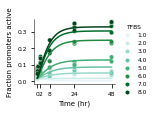

In [8]:
fig, ax = plt.subplots(figsize=(4/2.5,3/2.5))
colors = ['#f7fcfd','#e5f5f9','#ccece6','#99d8c9','#66c2a4','#41ae76','#238b45','#006d2c','#00441b']

def single_exp(t, t_constant, a): 
    return 1-a*np.exp(-(t*np.log(2)/t_constant))

def dfracon_dt(prom, t, k_on, k_off, n_tfbs):
    file_path = output_head + 'avgTF_single_exponential_popt.txt'
    popt_tf = np.loadtxt(file_path)
    avgTF = single_exp(t, *popt_tf)*equilibrium_vals[n_tfbs]
    dpdt = k_on*(avgTF)*(1-(prom)) - k_off*(prom)
    return dpdt

def promoter_on_fit(t, k_on, k_off): 
    tspan = []
    for time in np.unique(t):
        tspan.append(time)
        tspan.append(time)
    sol = []
    for n_tfbs in [1,2,3,4, 5, 6, 7, 8]:
        sol.append(list(odeint(dfracon_dt, 0.02, tspan, args=(k_on, k_off, n_tfbs))))
    sol = np.asarray(sol).flatten()
    return sol

def promoter_on_test(t, n_tfbs, k_on, k_off): 
    sol = []
    sol.append(list(odeint(dfracon_dt, 0.02, t, args=(k_on, k_off, n_tfbs))))
    sol = np.asarray(sol).flatten()
    return sol
    
df_to_fit = df_norm[df_norm['TFBS']>0][df_norm['dox_time_hr']>0]
sns.scatterplot(data = df_to_fit, x = 'dox_time_hr', y = 'promoter_active', hue='TFBS', palette=colors[1:], s = markersize, ax =ax, color='k')
df_to_fit = df_to_fit.sort_values(by=['TFBS', 'dox_time_hr', 'biorep'],ascending=True).drop_duplicates()
popt, pcov = curve_fit(promoter_on_fit, df_to_fit['dox_time_hr'], df_to_fit['promoter_active'], (0.05/60, 0.08/60), bounds=((0,0), (1, 1)), method='dogbox')
file_path = output_head + 'promoter_on_fit_popt.txt'
np.savetxt(file_path, popt, fmt='%s')
file_path = output_head + 'promoter_on_fit_pcov.txt'
np.savetxt(file_path, pcov, fmt='%s')
r2 = np.around(r2_score(promoter_on_fit(df_to_fit['dox_time_hr'], *popt), df_to_fit['promoter_active']), 2)
print(r2)
for i, amplicon in enumerate(opJS4):
    df_to_test = df_to_fit[df_to_fit['amplicon']==amplicon]
    # r2 = np.around(r2_score(np.asarray(single_exp(df_to_test['dox_time_hr'], *popt))*equilibrium_vals[i], df_to_test['avg_tf_bound']), 2)
    x = np.linspace(0,48,100) 
    plt.plot(x, promoter_on_test(x, i, *popt), color=colors[i],label=None)

ax.set_ylabel('Fraction promoters active', fontsize = fontsize)
plt.tick_params(axis='both', labelsize=tick_fontsize)
ax.set_xlabel('Time (hr)', fontsize = fontsize)
ax.set_box_aspect(0.8)
ax.set_xticks([0,2,8,24,48])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(fontsize=legend_fontsize, markerscale=0.5, frameon=False, title='TFBS', title_fontsize=legend_fontsize, bbox_to_anchor=(1,1))
plt.savefig(output_head+'fig5_plots/promoter_kinetics.pdf', dpi=300)

In [9]:
popt_prom = popt

0.95


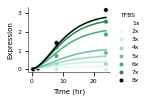

In [10]:
fig, ax = plt.subplots(figsize=(4/2.5,3/2.5))
colors = ['#f7fcfd','#e5f5f9','#ccece6','#99d8c9','#66c2a4','#41ae76','#238b45','k']

def single_exp(t, t_constant, a): 
    return 1-a*np.exp(-(t*np.log(2)/t_constant))

def drnafracon_dt(vals, t, k_trs, k_deg, n_tfbs):
    prom, rna = vals
    file_path = output_head + 'avgTF_single_exponential_popt.txt'
    popt_tf = np.loadtxt(file_path)
    avgTF = single_exp(t, *popt_tf)*equilibrium_vals[n_tfbs]
    k_on, k_off = popt_prom
    dpdt = k_on*(avgTF)*(1-(prom)) - k_off*(prom)
    drdt = k_trs*prom - k_deg*rna
    return [dpdt, drdt]

def rna_on_fit(t, k_trs, k_deg): 
    tspan = []
    for time in np.unique(t):
        tspan.append(time)
    sol = []
    for n_tfbs in [1,2,3,4, 5, 6,7,8]:
        sol.append(list(odeint(drnafracon_dt, [0.02,0], tspan, args=(k_trs, k_deg, n_tfbs))[:,1]))
    sol = np.asarray(sol).flatten()
    return sol

def rna_on_test(t, n_tfbs, k_trs, k_deg): 
    sol = []
    sol.append(list(odeint(drnafracon_dt, [0.02,0], t, args=(k_trs, k_deg, n_tfbs))[:,1]))
    sol = np.asarray(sol).flatten()
    return sol

rna_df_to_plot = rna_df.groupby(['Time','Cell Line','amplicon'])['Expression (relative to GAPDH)'].mean().reset_index()
rna_df_to_plot = rna_df_to_plot[rna_df_to_plot['Cell Line'].isin(['1x','2x','3x','4x','5x','6x','7x','8x'])]
sns.scatterplot(data = rna_df_to_plot, x = 'Time', y = 'Expression (relative to GAPDH)', s = markersize, ax =ax, hue='Cell Line', palette=colors)
# sns.lineplot(data = rna_df_to_plot, x = 'Time', y = 'Expression', ax =ax2, color='gray', hue='TFBS', palette=colors[1:])

df_to_fit = rna_df_to_plot.sort_values(by=['Cell Line', 'Time'],ascending=True)
popt, pcov = curve_fit(rna_on_fit, df_to_fit['Time'], df_to_fit['Expression (relative to GAPDH)'], p0=[1.67729023, 0.18804843], method='dogbox')
r2 = np.around(r2_score(rna_on_fit(df_to_fit['Time'], *popt), df_to_fit['Expression (relative to GAPDH)']), 2)
print(r2)
for i, tfbs in enumerate([1,2,3,4,5,6,7,8]):
    # r2 = np.around(r2_score(np.asarray(single_exp(df_to_test['dox_time_hr'], *popt))*equilibrium_vals[i], df_to_test['avg_tf_bound']), 2)
    x = np.linspace(0,24,100) 
    plt.plot(x, rna_on_test(x, tfbs, *popt), color=colors[tfbs-1],label=None)

ax.set_ylabel('Expression', fontsize = fontsize)
plt.tick_params(axis='both', labelsize=tick_fontsize)
ax.set_xlabel('Time (hr)', fontsize = fontsize)
ax.set_box_aspect(0.8)
# ax.set_xlim(0, 7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(fontsize=legend_fontsize, markerscale=0.5, frameon=False, title='TFBS', title_fontsize=legend_fontsize, bbox_to_anchor=(1,1))
plt.savefig(output_head + 'fig5_plots/rna_timecourse_fit_avg_techreps.pdf', dpi=300)

In [11]:
rna_popt = popt

0.99


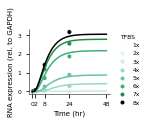

In [12]:
fig, ax = plt.subplots(figsize=(4/2.5,3/2.5))
colors = ['#f7fcfd','#e5f5f9','#ccece6','#99d8c9','#66c2a4','#41ae76','#238b45','k']

def single_exp(t, t_constant, a): 
    return 1-a*np.exp(-(t*np.log(2)/t_constant))

def drnafracon_dt(vals, t, k_trs, k_deg, thresh, n_tfbs):
    prom, rna = vals
    file_path = output_head + 'avgTF_single_exponential_popt.txt'
    popt_tf = np.loadtxt(file_path)
    avgTF = single_exp(t, *popt_tf)*equilibrium_vals[n_tfbs]
    k_on, k_off = popt_prom
    dpdt = k_on*(avgTF)*(1-(prom)) - k_off*(prom)
    # thresh = 0.11665878
    if (prom-thresh) < 0:
        drdt = - k_deg*rna
    else:
        drdt = k_trs*(prom-thresh) - k_deg*rna
    return [dpdt, drdt]

def rna_on_fit(t, k_trs, k_deg, thresh): 
    tspan = []
    for time in np.unique(t):
        tspan.append(time)
    sol = []
    for n_tfbs in [1,2,3,4, 5, 6,7,8]:
        sol.append(list(odeint(drnafracon_dt, [0.02,0], tspan, args=(k_trs, k_deg, thresh, n_tfbs))[:,1]))
    sol = np.asarray(sol).flatten()
    return sol

def rna_on_test(t, n_tfbs, k_trs, k_deg, thresh): 
    sol = []
    sol.append(list(odeint(drnafracon_dt, [0.02,0], t, args=(k_trs, k_deg, thresh, n_tfbs))[:,1]))
    sol = np.asarray(sol).flatten()
    return sol

rna_df_to_plot = rna_df.groupby(['Time','Cell Line','amplicon'])['Expression (relative to GAPDH)'].mean().reset_index()
rna_df_to_plot = rna_df_to_plot[rna_df_to_plot['Cell Line'].isin(['1x','2x','3x','4x','5x','6x','7x','8x'])]
sns.scatterplot(data = rna_df_to_plot, x = 'Time', y = 'Expression (relative to GAPDH)', s = markersize, ax =ax, hue='Cell Line', palette=colors)
# sns.lineplot(data = rna_df_to_plot, x = 'Time', y = 'Expression', ax =ax2, color='gray', hue='TFBS', palette=colors[1:])

df_to_fit = rna_df_to_plot.sort_values(by=['Cell Line', 'Time'],ascending=True)
popt, pcov = curve_fit(rna_on_fit, df_to_fit['Time'], df_to_fit['Expression (relative to GAPDH)'], p0=[1.67729023, 0.18804843, 0.1], method='dogbox')
r2 = np.around(r2_score(rna_on_fit(df_to_fit['Time'], *popt), df_to_fit['Expression (relative to GAPDH)']), 2)
print(r2)
for i, tfbs in enumerate([1,2,3,4,5,6,7,8]):
    # r2 = np.around(r2_score(np.asarray(single_exp(df_to_test['dox_time_hr'], *popt))*equilibrium_vals[i], df_to_test['avg_tf_bound']), 2)
    x = np.linspace(0,48,100) 
    plt.plot(x, rna_on_test(x, tfbs, *popt), color=colors[tfbs-1],label=None)

ax.set_ylabel('RNA expression (rel. to GAPDH)', fontsize = fontsize)
plt.tick_params(axis='both', labelsize=tick_fontsize)
ax.set_xlabel('Time (hr)', fontsize = fontsize)
ax.set_box_aspect(0.8)
# ax.set_xlim(0, 7)
ax.set_xticks([0,2,8,24,48])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(fontsize=legend_fontsize, markerscale=0.5, frameon=False, title='TFBS', title_fontsize=legend_fontsize, bbox_to_anchor=(1,1))
plt.savefig(output_head + 'fig5_plots/rna_timecourse_fit_avg_techreps.pdf', dpi=300)

In [13]:
popt

array([4.28657853, 0.39466675, 0.04967378])

In [14]:
rna_popt_thresh = popt

In [15]:
flow_summary_df = pd.read_csv(flow_head+'23.10.19_aggregate_flow_summary_paper_data.csv')
# subsetting flow dataframe
lines = ['opJS4', 'opJS5_v1','opJS5_v2']
flow_df = flow_summary_df[flow_summary_df['line'].isin(lines)][
                        flow_summary_df['dox'].isin([0,1000])][
                        # flow_summary_df['time']==24][
                        flow_summary_df['drug'].isna()]

zero_time = flow_df[flow_df['dox']==0]
nonzero_time = flow_df[flow_df['dox']==1000]
zero_time['time']=0
flow_df = pd.concat([zero_time, nonzero_time])

# to address background silencing in background 0 8x visible in flow plots
for index, row in flow_df[flow_df['amplicon']=='opJS4_8x_TetO_21bp_no_CG'].iterrows():
    if np.isnan(flow_df.at[index, 'MFI_ON']):
        continue
    flow_df.at[index, 'MFI'] = flow_df.at[index, 'MFI_ON']
flow_df = flow_df.groupby(['amplicon','time','TFBS'])['MFI'].mean().reset_index()   
# rna_df_to_plot['time']=rna_df_to_plot['Time']
# df = pd.merge(flow_df, rna_df_to_plot, on=['amplicon','time'])
df = flow_df[flow_df['TFBS']>0][flow_df['amplicon'].isin(opJS4)]
df = df.sort_values(by=['TFBS', 'time'],ascending=True)


0.92


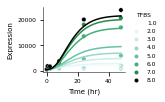

In [16]:
fig, ax = plt.subplots(figsize=(4/2.5,3/2.5))
# fig, ax = plt.subplots(figsize=(4,3))

colors = ['#f7fcfd','#e5f5f9','#ccece6','#99d8c9','#66c2a4','#41ae76','#238b45','k']

def single_exp(t, t_constant, a): 
    return 1-a*np.exp(-(t*np.log(2)/t_constant))

def dprotfracon_dt(vals, t, k_trl, k_deg_prot, n_tfbs):
    prom, rna, prot = vals
    file_path = output_head + 'avgTF_single_exponential_popt.txt'
    popt_tf = np.loadtxt(file_path)
    avgTF = single_exp(t, *popt_tf)*equilibrium_vals[n_tfbs]
    k_on, k_off = popt_prom
    dpdt = k_on*(avgTF)*(1-prom) - k_off*(prom-0.02)
    k_trs, k_deg = rna_popt
    drdt = k_trs*prom - k_deg*rna
    dprotdt = k_trl*rna - k_deg_prot*(prot-500)
    return [dpdt, drdt, dprotdt]

def protein_on_fit(t, k_trl, k_deg_prot): 
    tspan = []
    for time in np.unique(t):
        tspan.append(time)
    sol = []
    for n_tfbs in [1,2,3,4, 5, 6,7,8]:
        sol.append(list(odeint(dprotfracon_dt, [0.02,0,500], tspan, args=(k_trl, k_deg_prot, n_tfbs))[:,2]))
    sol = np.asarray(sol).flatten()
    return sol

def protein_on_test(t, n_tfbs, k_trl, k_deg_prot): 
    sol = []
    sol.append(list(odeint(dprotfracon_dt, [0.02,0,500], t, args=(k_trl, k_deg_prot, n_tfbs))[:,2]))
    sol = np.asarray(sol).flatten()
    return sol
df['MFI_to_fit']=df['MFI']
sns.scatterplot(data = df, x = 'time', y = 'MFI_to_fit', s = markersize, ax =ax, hue='TFBS', palette=colors)

popt, pcov = curve_fit(protein_on_fit, df['time'], df['MFI_to_fit'], p0=[1.23529329e+03, 1.62691376e-01], method='dogbox')
r2 = np.around(r2_score(protein_on_fit(df['time'], *popt), df['MFI_to_fit']), 2)
print(r2)
for i, tfbs in enumerate([1,2,3,4,5,6,7,8]):
    x = np.linspace(0,48,100) 
    plt.plot(x, protein_on_test(x, tfbs, *popt), color=colors[tfbs-1],label=None)

ax.set_ylabel('Expression', fontsize = fontsize)
plt.tick_params(axis='both', labelsize=tick_fontsize)
ax.set_xlabel('Time (hr)', fontsize = fontsize)
ax.set_box_aspect(0.8)
# ax.set_xlim(0, 7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(fontsize=legend_fontsize, markerscale=0.5, frameon=False, title='TFBS', title_fontsize=legend_fontsize, bbox_to_anchor=(1,1))
# plt.savefig(output_head + 'fig5_plots/rna_timecourse_fit_avg_techreps.pdf', dpi=300)

In [17]:
popt_prot = popt

In [18]:
popt_prot

array([1.11929165e+03, 1.60862032e-01])

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


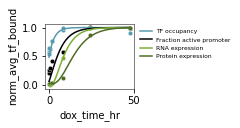

In [19]:
 def dprotfracon_dt(vals, t, k_trl, k_deg_prot, n_tfbs):
    prom, rna, prot = vals
    file_path = output_head + 'avgTF_single_exponential_popt.txt'
    popt_tf = np.loadtxt(file_path)
    avgTF = single_exp(t, *popt_tf)*equilibrium_vals[n_tfbs]
    k_on, k_off = popt_prom
    dpdt = k_on*(avgTF)*(1-prom) - k_off*(prom-0.02)
    k_trs, k_deg, thresh = rna_popt_thresh
    drdt = k_trs*(prom-thresh) - k_deg*rna
    dprotdt = k_trl*rna - k_deg_prot*(prot-500)
    return [dpdt, drdt, dprotdt]

fig, ax = plt.subplots(figsize=(4/2.5,3/2.5))
x = np.linspace(0,48,100)
file_path = output_head + 'avgTF_single_exponential_popt.txt'
popt_tf = np.loadtxt(file_path)
plt.plot(x, single_exp(x, *popt_tf), color='#579AAD')
out = odeint(dprotfracon_dt, [0.02,0,500], x, args=(popt_prot[0], popt_prot[1], 7))
plt.plot(x, out[:,0]/out[-1,0], color='k')
plt.plot(x, out[:,1]/out[-1,1], color='#7cad37')
plt.plot(x, out[:,2]/out[-1,2], color='#4d6c23')

df_to_fit = df_norm[df_norm['TFBS']==7][df_norm['dox_time_hr']>0]
sns.scatterplot(data = df_to_fit, x = 'dox_time_hr', y = 'norm_avg_tf_bound', s = markersize, ax =ax, color='#579AAD')
df_to_fit = smf_df.groupby(['TFBS','dox_time_hr'])['promoter_active'].mean().reset_index()
df_to_fit = df_to_fit[df_to_fit['TFBS']==7][df_to_fit['dox_time_hr']>0]
df_to_fit['norm_promoter_active']=df_to_fit['promoter_active']/df_to_fit[df_to_fit['dox_time_hr']==48]['promoter_active'].to_numpy()[0]
sns.scatterplot(data = df_to_fit, x = 'dox_time_hr', y = 'norm_promoter_active', s = markersize, ax =ax, color='k')

rna_df_to_plot = rna_df.groupby(['Time','Cell Line','amplicon'])['Expression (relative to GAPDH)'].mean().reset_index()
rna_df_to_plot = rna_df_to_plot[rna_df_to_plot['Cell Line'].isin(['7x'])]
rna_df_to_plot['norm_expression']=rna_df_to_plot['Expression (relative to GAPDH)']/rna_df_to_plot[rna_df_to_plot['Time']==24]['Expression (relative to GAPDH)'].to_numpy()[0]
sns.scatterplot(data = rna_df_to_plot, x = 'Time', y = 'norm_expression', s = markersize, ax =ax, color='#7cad37')

df = flow_df[flow_df['TFBS']==7][flow_df['amplicon'].isin(opJS4)]
df = df.sort_values(by=['TFBS', 'time'],ascending=True)
df['norm_MFI']=df['MFI']/df[df['time']==48]['MFI'].to_numpy()[0]
sns.scatterplot(data = df, x = 'time', y = 'norm_MFI', s = markersize, ax =ax, color='#4d6c23')
plt.legend(['TF occupancy', 'Fraction active promoter', 'RNA expression', 'Protein expression'],fontsize=legend_fontsize, markerscale=0.5, frameon=False, bbox_to_anchor=(1,1))
# plt.savefig(output_head+'fig5_plots/all_kinetics_7x.pdf', dpi=300)


In [89]:
 
    
def single_exp_norm(t, n_tfbs): 
    file_path = output_head + 'avgTF_single_exponential_popt.txt'
    t_constant, a = np.loadtxt(file_path)
    t = np.asarray(t)
    return (1-a*np.exp(-(t*np.log(2)/t_constant)))*equilibrium_vals[n_tfbs]

def dprotfracon_dt(vals, t, l, n_tfbs):
    prom, rna, prot = vals
    file_path = output_head + 'avgTF_single_exponential_popt.txt'
    popt_tf = np.loadtxt(file_path)
    avgTF = single_exp(t, *popt_tf)*equilibrium_vals[n_tfbs]
    k_on, k_off = popt_prom
    dpdt = k_on*(avgTF)*(1-prom) - k_off*(prom-0.02)
    k_trs, k_deg, thresh = rna_popt_thresh
    drdt = k_trs*(prom-thresh) - k_deg*rna
    k_trl, k_deg_prot = popt_prot
    dprotdt = k_trl*rna - k_deg_prot*(prot-500)
    return [dpdt, drdt, dprotdt]

r2s = {}
for n_tfbs in range(9):
    df_tf = smf_df.groupby(['TFBS','dox_time_hr'])['avg_tf_bound'].mean().reset_index()
    df_tf = df_tf[df_tf['TFBS']==n_tfbs][df_tf['dox_time_hr']>0]
    df_prom = smf_df.groupby(['TFBS','dox_time_hr'])['promoter_active'].mean().reset_index()
    df_prom = df_prom[df_prom['TFBS']==n_tfbs][df_prom['dox_time_hr']>0]
    df_rna = rna_df.groupby(['Time','Cell Line','amplicon'])['Expression (relative to GAPDH)'].mean().reset_index()
    df_rna = df_rna[df_rna['Cell Line'].isin(['{}x'.format(str(n_tfbs))])]
    df_prot = flow_df[flow_df['TFBS']==n_tfbs][flow_df['amplicon'].isin(opJS4)]
    df_prot = df_prot.sort_values(by=['time'],ascending=True)
    df_prot = df_prot.groupby(['time'])['MFI'].mean().reset_index()
    amp = {}
    x = list(sorted(set([round_to_significant_digits(n,2) for n in np.linspace(0,48,8640)])))
    out = odeint(dprotfracon_dt, [0.02,0,500], x, args=(n_tfbs, n_tfbs))
    prom = np.asarray(out[:,0])
    rna = np.asarray(out[:,1])
    prot = np.asarray(out[:,2])
    
    tf = single_exp_norm(x, n_tfbs)
    tf_times = np.asarray([round_to_significant_digits(n,2) for n in np.asarray(df_tf['dox_time_hr'].unique())])
    rna_times = np.asarray([round_to_significant_digits(n,2) for n in np.asarray(df_rna['Time'].unique())])
    prot_times = np.asarray([round_to_significant_digits(n,2) for n in np.asarray(df_prot['time'].unique())])
    
    amp['tf'] = r2_score(df_tf['avg_tf_bound'], tf[list(np.where(np.isin(x, tf_times))[0])])
    amp['prom'] = r2_score(df_prom['promoter_active'], prom[list(np.where(np.isin(x, tf_times))[0])])
    amp['rna'] = r2_score(df_rna['Expression (relative to GAPDH)'], rna[list(np.where(np.isin(x, rna_times))[0])])
    amp['prot'] = r2_score(df_prot['MFI'], prot[list(np.where(np.isin(x, prot_times))[0])])

    r2s[opJS4[n_tfbs]] = amp
    
df = pd.DataFrame.from_dict(r2s, orient='index')

    

In [90]:
df

,tf,prom,rna,prot
opJS4_0x_TetO_21bp_no_CG,1.000000,-1.353531,-1.483790e+06,-148.410977
opJS4_1x_TetO_21bp_no_CG,0.897011,-0.195032,-6.475308e+04,-243.301349
opJS4_2x_TetO_21bp_no_CG,0.628594,0.171294,0.000000e+00,-108.030086
opJS4_3x_TetO_21bp_no_CG,0.829181,-0.345500,0.000000e+00,-42.936735
opJS4_4x_TetO_21bp_no_CG,0.824328,-1.174331,-6.117379e-01,-6.017372
opJS4_5x_TetO_21bp_no_CG,0.880577,0.480755,9.449338e-01,0.798806
opJS4_6x_TetO_21bp_no_CG,0.947482,0.743970,9.119056e-01,0.995832
opJS4_7x_TetO_21bp_no_CG,0.885283,0.800772,9.769597e-01,0.995520
opJS4_8x_TetO_21bp_no_CG,0.963798,0.942699,9.975817e-01,0.987942


In [113]:
tf_real=[]
tf_pred=[]
prom_real=[]
prom_pred=[]
rna_real=[]
rna_pred=[]
prot_real=[]
prot_pred=[]

for n_tfbs in range(9):
    df_tf = smf_df.groupby(['TFBS','dox_time_hr'])['avg_tf_bound'].mean().reset_index()
    df_tf = df_tf[df_tf['TFBS']==n_tfbs][df_tf['dox_time_hr']>0]
    df_prom = smf_df.groupby(['TFBS','dox_time_hr'])['promoter_active'].mean().reset_index()
    df_prom = df_prom[df_prom['TFBS']==n_tfbs][df_prom['dox_time_hr']>0]
    df_rna = rna_df.groupby(['Time','Cell Line','amplicon'])['Expression (relative to GAPDH)'].mean().reset_index()
    df_rna = df_rna[df_rna['Cell Line'].isin(['{}x'.format(str(n_tfbs))])]
    df_prot = flow_df[flow_df['TFBS']==n_tfbs][flow_df['amplicon'].isin(opJS4)]
    df_prot = df_prot.sort_values(by=['time'],ascending=True)
    df_prot = df_prot.groupby(['time'])['MFI'].mean().reset_index()

    tf_times = np.asarray([round_to_significant_digits(n,2) for n in np.asarray(df_tf['dox_time_hr'].unique())])
    rna_times = np.asarray([round_to_significant_digits(n,2) for n in np.asarray(df_rna['Time'].unique())])
    prot_times = np.asarray([round_to_significant_digits(n,2) for n in np.asarray(df_prot['time'].unique())])  

    x = list(sorted(set([round_to_significant_digits(n,2) for n in np.linspace(0,48,8640)])))
    out = odeint(dprotfracon_dt, [0.02,0,500], x, args=(n_tfbs, n_tfbs))
    prom = np.asarray(out[:,0])
    rna = np.asarray(out[:,1])
    prot = np.asarray(out[:,2])
    tf = single_exp_norm(x, n_tfbs)
    tf_real.append(df_tf['avg_tf_bound'])
    tf_pred.append(tf[list(np.where(np.isin(x, tf_times))[0])])
    prom_real.append(df_prom['promoter_active'])
    prom_pred.append(prom[list(np.where(np.isin(x, tf_times))[0])])
    rna_real.append(df_rna['Expression (relative to GAPDH)'])
    rna_pred.append(rna[list(np.where(np.isin(x, rna_times))[0])])
    prot_real.append(df_prot['MFI'])
    prot_pred.append(prot[list(np.where(np.isin(x, prot_times))[0])])

def flatten(l):
    return [item for sublist in l for item in sublist]


# tf_real=flatten(tf_real)
# tf_pred=flatten(tf_pred)
# prom_real=flatten(prom_real)
# prom_pred=flatten(prom_pred)
# rna_real=flatten(rna_real)
# rna_pred=flatten(rna_pred)
# prot_real=flatten(prot_real)
# prot_pred=flatten(prot_pred)

# r2s = {}
# r2s['tf'] = {'r2':r2_score(tf_real,tf_pred)}
# r2s['prom'] = {'r2':r2_score(prom_real,prom_pred)}
# r2s['rna'] = {'r2':r2_score(rna_real, rna_pred)}
# r2s['prot'] = {'r2':r2_score(prot_real, prot_pred)}
    
# df = pd.DataFrame.from_dict(r2s)


In [122]:
from matplotlib.colors import LinearSegmentedColormap




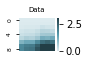

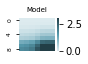

In [160]:
cmap_colors = ['#ddebef','#579AAD','#223e46']  # Red to White to Blue
custom_cmap_tf = LinearSegmentedColormap.from_list("custom_colormap", cmap_colors, N=256)
fig, ax = plt.subplots(figsize=(4/2.5/2,3/2.5/2))
plt.title('Data', fontsize=7)
sns.heatmap(tf_real, xticklabels=[], cmap=custom_cmap_tf,linewidths=.5,vmin=0, vmax=3, linecolor='None')
plt.tick_params(axis='both', labelsize=tick_fontsize)
plt.savefig(output_head+'fig5_plots/tf_data_heatmap.pdf', dpi=300)

fig, ax = plt.subplots(figsize=(4/2.5/2,3/2.5/2))
sns.heatmap(tf_pred, xticklabels=[], cmap=custom_cmap_tf,linewidths=.5,vmin=0, vmax=3, linecolor='None')
plt.tick_params(axis='both', labelsize=tick_fontsize)
plt.title('Model', fontsize=7)
plt.savefig(output_head+'fig5_plots/tf_model_heatmap.pdf', dpi=300)


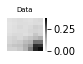

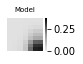

In [161]:
cmap_colors = ['#eaeaea','#969696','k']  # Red to White to Blue
custom_cmap_prom = LinearSegmentedColormap.from_list("custom_colormap", cmap_colors, N=256)
fig, ax = plt.subplots(figsize=(4/2.5/2,3/2.5/2))
plt.title('Data', fontsize=7)
sns.heatmap(prom_real,yticklabels=[],  xticklabels=[], cmap=custom_cmap_prom,linewidths=.5,vmin=0, vmax=0.38, linecolor='None')
plt.tick_params(axis='both', labelsize=tick_fontsize)
plt.savefig(output_head+'fig5_plots/prom_data_heatmap.pdf', dpi=300)

fig, ax = plt.subplots(figsize=(4/2.5/2,3/2.5/2))
sns.heatmap(prom_pred, yticklabels=[], xticklabels=[], cmap=custom_cmap_prom,linewidths=.5,vmin=0, vmax=0.38, linecolor='None')
plt.tick_params(axis='both', labelsize=tick_fontsize)
plt.title('Model', fontsize=7)
plt.savefig(output_head+'fig5_plots/prom_model_heatmap.pdf', dpi=300)

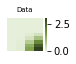

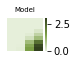

In [162]:
cmap_colors = ['#e6efda','#7B9E45','#313f1c']  # Red to White to Blue
custom_cmap_prom = LinearSegmentedColormap.from_list("custom_colormap", cmap_colors, N=256)
fig, ax = plt.subplots(figsize=(4/2.5/2,3/2.5/2))
plt.title('Data', fontsize=7)
sns.heatmap(rna_real, yticklabels=[], xticklabels=[], cmap=custom_cmap_prom,linewidths=.5,vmin=0, vmax=3, linewidth=0, linecolor='None')
plt.tick_params(axis='both', labelsize=tick_fontsize)
plt.savefig(output_head+'fig5_plots/rna_data_heatmap.pdf', dpi=300)

fig, ax = plt.subplots(figsize=(4/2.5/2,3/2.5/2))
sns.heatmap(rna_pred, yticklabels=[], xticklabels=[], cmap=custom_cmap_prom,linewidths=.5,vmin=0, vmax=3, linewidth=0, linecolor='None')
plt.tick_params(axis='both', labelsize=tick_fontsize)
plt.title('Model', fontsize=7)
plt.savefig(output_head+'fig5_plots/rna_model_heatmap.pdf', dpi=300)

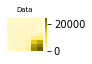

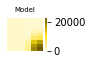

In [163]:
cmap_colors = ['#fff9d2','#FEDE10','#6c5d00']  # Red to White to Blue
custom_cmap_prot = LinearSegmentedColormap.from_list("custom_colormap", cmap_colors, N=256)
fig, ax = plt.subplots(figsize=(4/2.5/2,3/2.5/2))
plt.title('Data', fontsize=7)
sns.heatmap(prot_real, yticklabels=[], xticklabels=[], cmap=custom_cmap_prot,linewidths=.5,vmin=0, linewidth=0, linecolor='None')
plt.tick_params(axis='both', labelsize=tick_fontsize)
plt.savefig(output_head+'fig5_plots/prot_data_heatmap.pdf', dpi=300)

fig, ax = plt.subplots(figsize=(4/2.5/2,3/2.5/2))
sns.heatmap(prot_pred, yticklabels=[], xticklabels=[], cmap=custom_cmap_prot,linewidths=.5,vmin=0, linewidth=0, linecolor='None')
plt.tick_params(axis='both', labelsize=tick_fontsize)
plt.title('Model', fontsize=7)
plt.savefig(output_head+'fig5_plots/prot_model_heatmap.pdf', dpi=300)

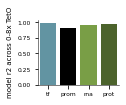

In [104]:
fig, ax = plt.subplots(figsize=(4/2.5,3/2.5))
plt.tick_params(axis='both', labelsize=tick_fontsize)
# ax.set_xticks([])
ax.set_ylabel('model r2 across 0-8x TetO', fontsize = fontsize)
ax.set_box_aspect(0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_facecolor('none')
sns.barplot(data=df, palette=['#579AAD','k','#7cad37','#4d6c23'])
plt.savefig(output_head+'fig5_plots/goodness_of_fit.pdf', dpi=300)

In [ ]:
sns.heatmap(data, cmap='viridis', annot=True, fmt=".2f", linewidths=.5)


In [106]:
popt_prom

array([0.01757174, 0.12631662])

In [108]:
rna_popt

array([2.00433094, 0.22460502])

In [109]:
popt_prot

array([1.11929165e+03, 1.60862032e-01])